# Group 5 Image Analysis 

## Authors: Sikta Das Adhikari, Kara Dobson, Wendy Leuenberger, Sidney Sitar

### Settings and packages

In [2]:
from plantcv import plantcv as pcv
import cv2
from matplotlib.pylab import plt
import pandas as pd
#The following code snip-it reads any file from the internet and saves it to your local directory.
from urllib.request import urlopen, urlretrieve
from imageio import imread, imsave
import numpy as np
from PIL import Image
import colorsys
import matplotlib.colors as colors
from scipy import ndimage
import skimage.color as color


class options:
    def __init__(self):
        self.debug = "plot"
        self.writeimg= False
        self.result = "color_tutorial_results.json"
        self.outdir = "."
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

In [12]:
# Paths
Group5 = 'C:\\Users\\Wendy\\OneDrive - Michigan State University\\CSS 844\\Module 1\\Group5\\'
ProcessedImage = 'C:\\Users\\Wendy\\OneDrive - Michigan State University\\CSS 844\\Module 1\\Processed Product Images\\'

## Performing color correction using the color cards

In [3]:
# Read in excel spreadsheet with image names as a list
# Will use this to loop the color correcting code through our images
df = pd.read_csv(Group5 + "list_of_image_names.csv")
mylist = df['ImageName'].tolist()
before_list = mylist[228:234] # selecting all before images
after_list = mylist[313:319] # selecting all after images
# note: I left out some images where the color card wasn't in the exact same position
# print(before_list)
# print(after_list)

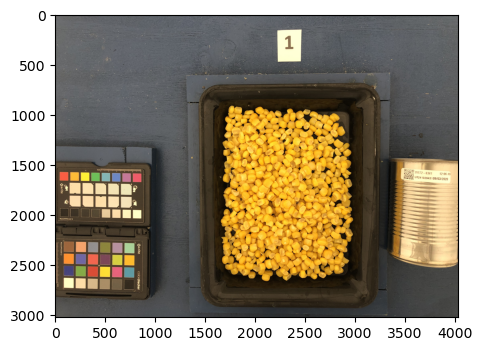

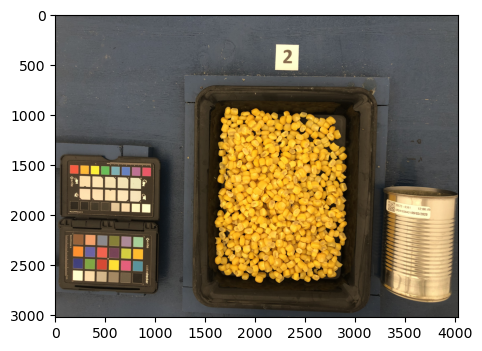

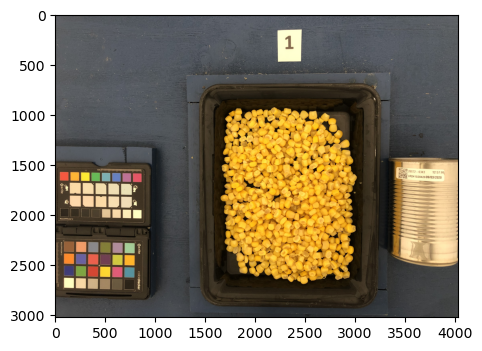

In [13]:
# Import target and source images w/ color cards
# Source = the image that will be color corrected, target = the image used to determine baseline color
# Randomly selected a target image to use for color correction that had vibrant colors
target_img, targetpath, targetname = pcv.readimage(filename=ProcessedImage + "IMG_9311.JPG")
source_img, sourcepath, sourcename = pcv.readimage(filename=ProcessedImage + "IMG_9396.JPG") #after image
source_img2, sourcepath2, sourcename = pcv.readimage(filename=ProcessedImage + "IMG_9312.JPG") #before image
# I read in two source images, one which is an after image, and one that is a before image
# The color card is in the same location for the set of before and the set of after images, so I'm
# making two separate transformation matricies for each of these color card locations (below)
# Note: this step would not be needed if the color card is in the exact same location for all photos, you'd
# simply need one target, one source, then run the transformation on all images

## Manually color correcting

### This manual color correcting was performed because we could not automatically color correct. We would need a 4x6 color card or color cards in the same exact spot to be able to automatically color correct. See below for the code to automatically color correct if these conditions are met

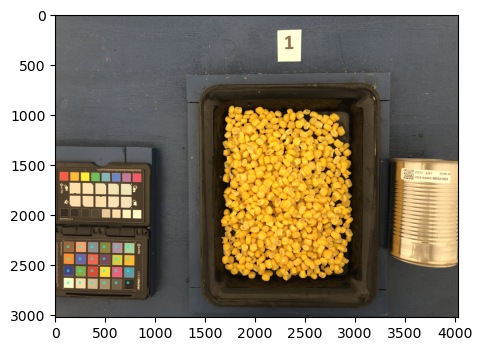

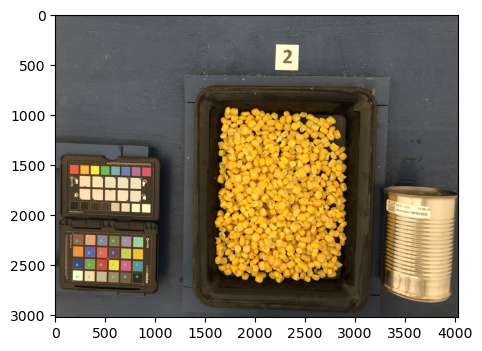

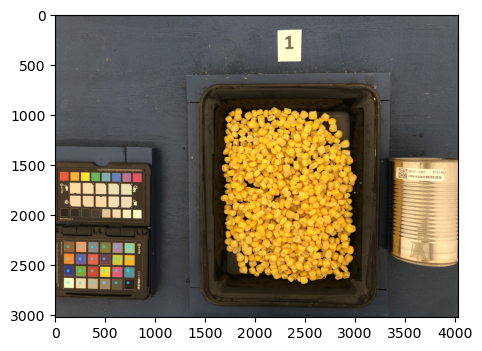

In [6]:
# Making masks for color correction
# Manually setting coordinates because plantCV can't auto detect color cards that aren't 4x6
# The main thing to change here for manually setting the color card is the coordinates (start_coord) and the spacing
target_mask = pcv.transform.create_color_card_mask(rgb_img=target_img, radius=10, start_coord=(130,2320), spacing=(120,120), ncols=6, nrows=4)
source_mask = pcv.transform.create_color_card_mask(rgb_img=source_img, radius=10, start_coord=(220,2260), spacing=(120,120), ncols=6, nrows=4)
source_mask2 = pcv.transform.create_color_card_mask(rgb_img=source_img2, radius=10, start_coord=(130,2320), spacing=(120,120), ncols=6, nrows=4)

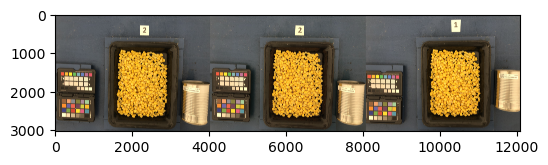

In [7]:
# After image transformation matrix
# Setting output directory for color corrected images
outdir = "."

# Set global debug behavior to None (default), "print" (to file), or "plot" (Jupyter Notebooks or X11)
pcv.params.debug = 'plot'

# This code saves the color corrected image to your directory
# It also generates a transformation matrix that can be used to color correct more images
target_matrix, source_matrix, transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                                                 target_mask=target_mask, 
                                                                                                 source_img=source_img, 
                                                                                                 source_mask=source_mask, 
                                                                                                 output_directory=outdir)

# outputted corrected image will be saved as something like "10_corrected.png"
# I've been manually re-naming these as they're outputted to keep track

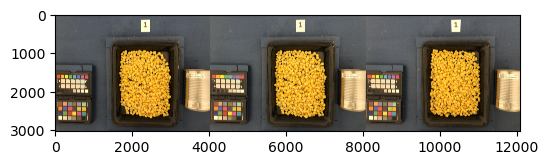

In [8]:
# Before image transformation matrix
# Setting output directory for color corrected images
outdir = "."

# Set global debug behavior to None (default), "print" (to file), or "plot" (Jupyter Notebooks or X11)
pcv.params.debug = 'plot'

# This code saves the color corrected image to your directory
# It also generates a transformation matrix that can be used to color correct more images
target_matrix2, source_matrix2, transformation_matrix2, corrected_img2 = pcv.transform.correct_color(target_img=target_img, 
                                                                                                 target_mask=target_mask, 
                                                                                                 source_img=source_img2, 
                                                                                                 source_mask=source_mask2, 
                                                                                                 output_directory=outdir)


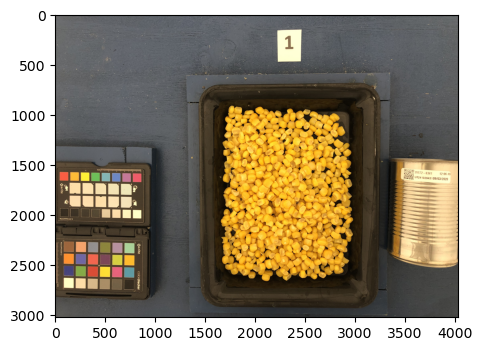

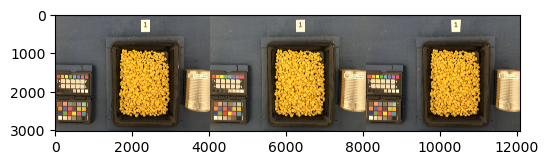

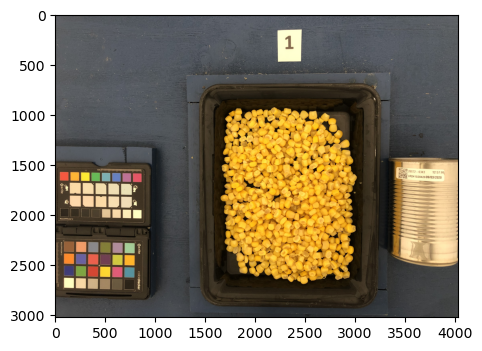

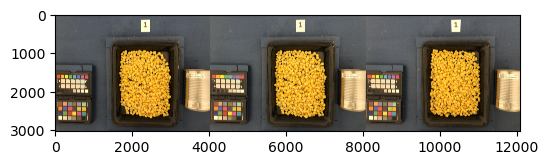

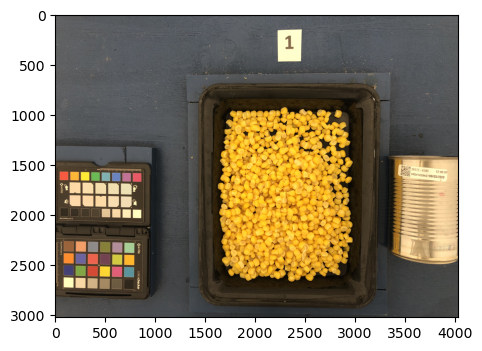

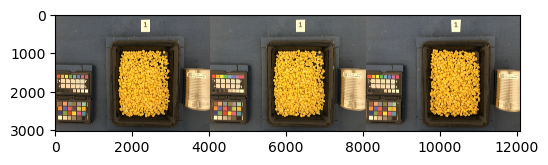

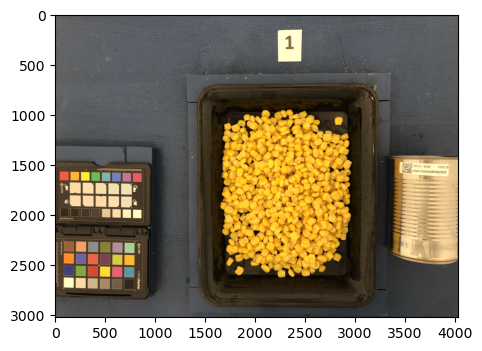

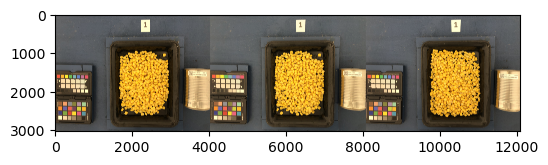

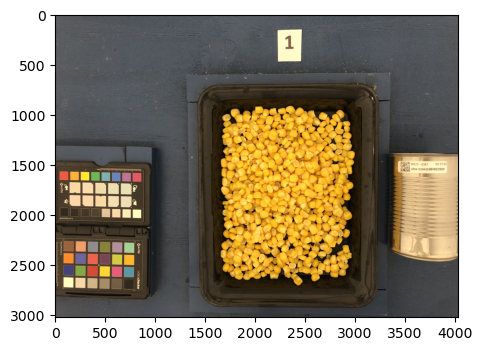

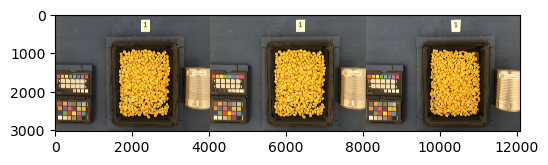

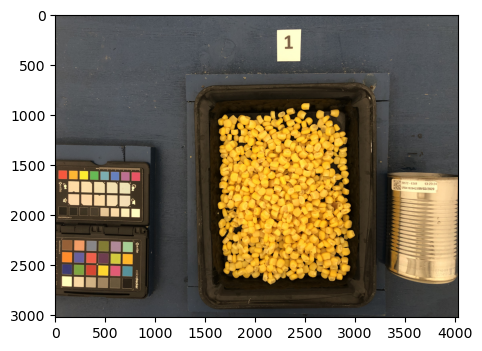

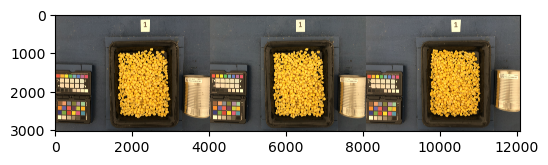

In [14]:
# Color correcting more images using the transformation matrix created in the above step
# Before images
for i in before_list:
    new_source, newpath, newname = pcv.readimage(filename=ProcessedImage + i) #read in new image for transformation
    corrected_img = pcv.transform.apply_transformation_matrix(source_img=new_source, target_img=target_img, transformation_matrix=transformation_matrix2)
# the outputted images are in numerical order following the order of images in the list
# note: I am re-running the target and source image here to make sure everything was corrected the same way
# So the image outputted here (and below for after images) are the final corrected ones

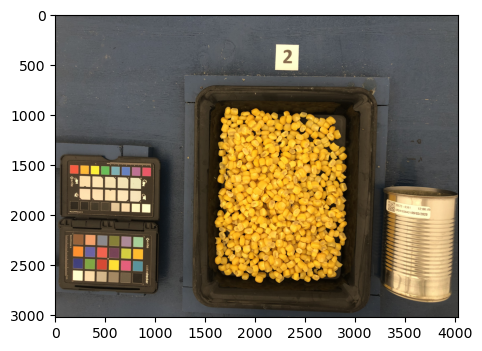

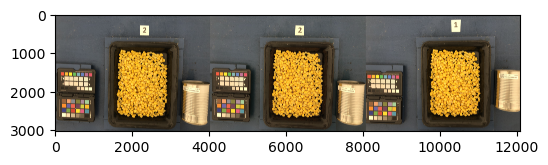

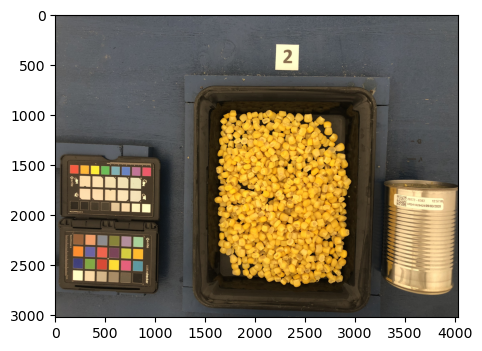

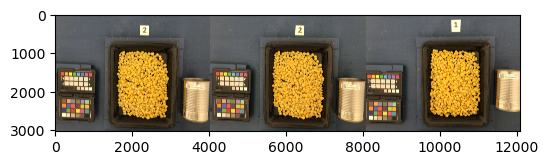

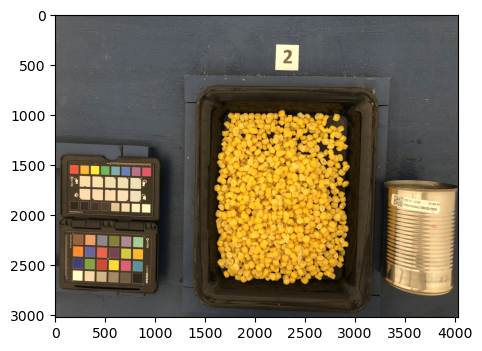

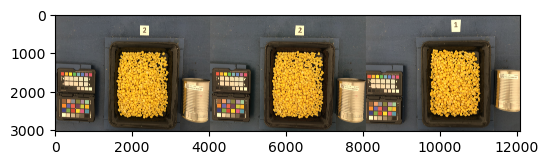

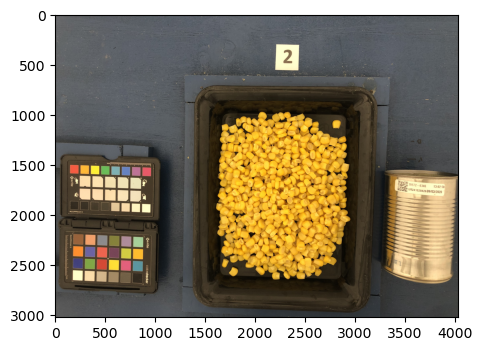

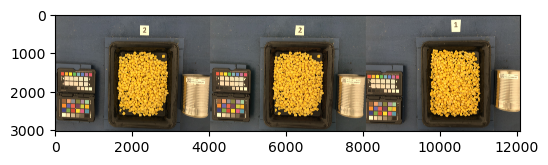

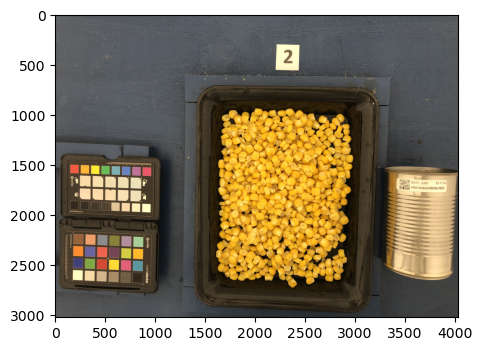

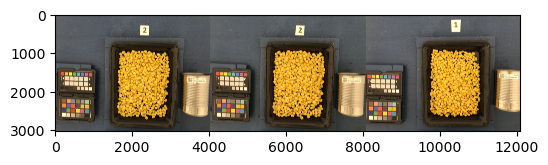

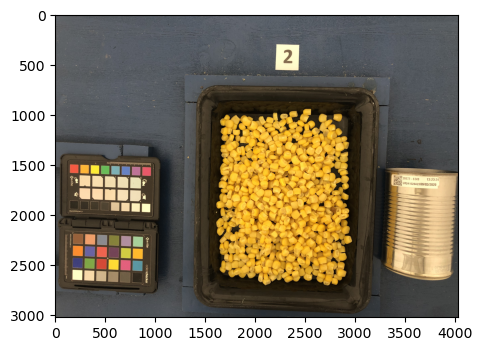

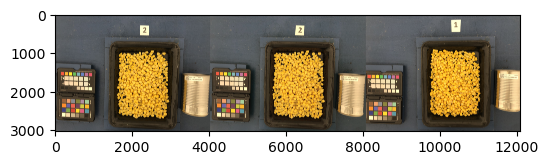

In [15]:
# Color correcting more images using the transformation matrix created in the above step
# After images
for i in after_list:
    new_source, newpath, newname = pcv.readimage(filename=ProcessedImage + i) #read in new image for transformation
    corrected_img = pcv.transform.apply_transformation_matrix(source_img=new_source, target_img=target_img, transformation_matrix=transformation_matrix)


## Automatic color correcting
### Only run this code if the images contain a 4x6 color card, otherwise use the manual correction above

In [ ]:
# If the color card is 4x6 ONLY, the code below should automatically detect the location of the color card
# and then perform color correction

# Import target and source images w/ color cards
# Source = the image that will be color corrected, target = the image used to determine baseline color
# Randomly selected a target image to use for color correction that had vibrant colors
target_img, t_path, t_filename = pcv.readimage(filename=ProcessedImage + "IMG_9311.JPG")
source_img, s_path, s_filename = pcv.readimage(filename=ProcessedImage + "IMG_9396.JPG")

In [ ]:
# Create a labeled color card mask, first use color card finder function 

# This won't print anything out but you can look at the dataframe output 
# to see the chips that the function found. 

# Inputs:
#   rgb_img - RGB image data containing color card 
#   threshold - Optional threshold method; either 'adaptgauss' (default), 'normal', or 'otsu'
#   threshvalue - Optional threhsolding value (default threshvalue = 125) 
#   blurry - Optional boolean; False (default) or if True then image sharpening is applied 
#   background - Optional type of image background; 'dark' (default) or 'light'
dataframe1, start, space = pcv.transform.find_color_card(rgb_img=target_img)

In [ ]:
# Make the labeled mask of the target image 

# Inputs: 
#   rgb_img - RGB image data containing color card 
#   radius - Radius of color card chips (masks make circles on chips)
#   start_coord - Two-element tuple of the first chip mask, (starting x, starting y) 
#   spacing - Two-element tuple of the horizontal and vertical spacing between chip masks
#   nrows - Number of chip rows
#   ncols - Number of chip columns 
#   exclude - Optional list of chips to exclude. List largest to smallest index 
target_mask = pcv.transform.create_color_card_mask(target_img, radius=5, start_coord=start, 
                                                   spacing=(38,38), nrows=6, ncols=4)

In [ ]:
# Try using the same parameters and check to make sure it's appropriate for the source image
source_mask = pcv.transform.create_color_card_mask(source_img, radius=5, start_coord=start, 
                                                   spacing=(38,38), nrows=6, ncols=4)

In [ ]:
# Run color correction 

# Inputs:
#   target_img - RGB image with color chips
#   target_mask - Grayscale image with color chips and background each represented with unique values 
#   source_img - RGB image with color chips 
#   source_mask - Grayscale image with color chips and background each represented with unique values 
#   output_directory - File path to which the target_matrix, source_matrix, and tranformation_matrix will be saved
tm, sm, transformation_matrix, corrected_img = pcv.transform.correct_color(target_img=target_img, 
                                                                           target_mask=target_mask, 
                                                                           source_img=source_img, 
                                                                           source_mask=source_mask,
                                                                           output_directory=args.outdir)


In [ ]:
# Read in excel spreadsheet with image names as a list
# Will use this to loop the color correcting code through our images
df = pd.read_excel(Group5 + 'list_of_image_names.xlsx')
mylist = df['ImageName'].tolist()
# Color correcting more images using the transformation matrix created in the above step
for i in mylist:
    new_source, newpath, newname = pcv.readimage(filename=ProcessedImage + i) #read in new image for transformation
    corrected_img = pcv.transform.apply_transformation_matrix(source_img=new_source, target_img=target_img, transformation_matrix=transformation_matrix)


# Kernel Segmentation

## 

### Thresholding

In [17]:
from ipywidgets import interactive,fixed

def hsv_color_threshold(im, hmin=-0.01,hmax=1.01, smin=-0.01,smax=1.01,vmin=-1,vmax=256):
    # Pull out the red, gree and blue matrixes
    hsv = colors.rgb_to_hsv(im)
    h = hsv[:,:,0];
    s = hsv[:,:,1];
    v = hsv[:,:,2];
    
    # trick because the color space wraps
    if hmin > hmax:
        b_img = (h > hmin) | (h < hmax)
    else:
        b_img = (h > hmin) & (h < hmax);
    
    
    b_img = (b_img & 
         (s > smin) & (s < smax) & 
         (v > vmin) & (v < vmax));
    
    f, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,5))
    ax1.imshow(im)
    ax1.set_axis_off()
    
    ax2.imshow(b_img,cmap='gray', vmin=0, vmax=1)
    ax2.set_title('Value - Brightness')
    ax2.set_axis_off()

    plt.show()
    return b_img*1;

# w = interactive(hsv_color_threshold, im=fixed(im),
#          hmin=(-0.01,1.01,0.01), hmax=(-0.01,1.01,0.01), 
#          smin=(-0.01,1.01,0.01), smax=(-0.01,1.01,0.01), 
#          vmin=(-1,256), vmax=(-1,256),__manual=True);

### Create empty data frame

In [18]:
Testdata = {'Image': ['Test'], 'sum_red_top': [None], 'sum_red_top2': [None], 'sum_red_all': [None], 'sat_maxbin': [None],
           'RedMean': [None], 'GreenMean': [None], 'BlueMean': [None]}

df_yellow = pd.DataFrame(Testdata).set_index('Image')

# df_yellow

num = 0  # 907 images

### Loop through all images and perform segmentation and color extraction

In [163]:
# Create a loop to read in all images and perform segmentation and color quantification


for i in mylist:
    # Create path for file
    path = ProcessedImage + i
    im = imread(path)
    binary_im = hsv_color_threshold(im, 0.05,0.19, 0.07, 1.01, 129, 256)
    bw1 = ndimage.binary_erosion(binary_im, iterations=5)
    bw2 = ndimage.binary_dilation(bw1, iterations=7)
    bw3 = ndimage.binary_closing(bw2, iterations=20)

    #im2 = im.copy()
    im[bw3==False,:] = 0 #Remove Background
    
    bw=hsv_color_threshold(im,0.11,0.19,0.44,1.01,200,256)
    lab, num_features = ndimage.measurements.label(bw)
   
    axis_0=np.where(np.sum(lab==0,axis=0)<2800)
    axis_1=np.where(np.sum(lab==0,axis=1)<4000)

    if(len(axis_0[0])==0):
        axis_0=np.where(np.sum(lab==0,axis=0)<4000)
        axis_1=np.where(np.sum(lab==0,axis=1)<2800)
    
    st1=axis_0[0][0]
    st2=axis_1[0][0]
    en1=axis_0[0][-1]
    en2=axis_1[0][-1]
    
    seg1 = im[st2:en2,st1:en1]
    plt.imshow(seg1)
    
    Red = seg1[:,:,0][(seg1[:,:,0] > 0) | (seg1[:,:,1] > 0) | (seg1[:,:,2] > 0)]
    Green = seg1[:,:,1][(seg1[:,:,0] > 0) | (seg1[:,:,1] > 0) | (seg1[:,:,2] > 0)]
    Blue = seg1[:,:,2][(seg1[:,:,0] > 0) | (seg1[:,:,1] > 0) | (seg1[:,:,2] > 0)]
        
      
    out_red = plt.hist(Red.ravel(), alpha = 0.5, bins = 256, range = (0, 256), color = 'red')
    out_grn = plt.hist(Green.ravel(), alpha = 0.5, bins = 256, range = (0, 256), color = 'green')
    out_blu = plt.hist(Blue.ravel(), alpha = 0.5, bins = 256, range = (0, 256), color = 'blue')

    sum_red_top = sum(out_red[0][255:256])
    sum_red_top2 = sum(out_red[0][250:256])
    sum_red_all = sum(out_red[0][1:256])
    
    Rd = seg1[:,:,0][(seg1[:,:,0] > 254)]
    Grn = seg1[:,:,1][(seg1[:,:,0] > 254)]
    Blu = seg1[:,:,2][(seg1[:,:,0] > 254)]

    R_mean = np.mean(Rd)
    G_mean = np.mean(Grn)
    B_mean = np.mean(Blu)
    
    # Saturation values
    hsv = color.rgb2hsv(seg1)
    Sat1 = hsv[:, :, 1][hsv[:,:,2] > 0.3]
    SatSave = plt.hist(Sat1.ravel(), alpha = 0.5, bins = 50, range = (0, 1), color = 'orange', label = 'Saturation');  # Saturation
    bin_max = np.where(SatSave[0] == SatSave[0].max())
    sat_value = SatSave[1][bin_max][0]
    
    NewRow = {'Image': [i], 'sum_red_top': [sum_red_top], 'sum_red_top2': [sum_red_top2], 'sum_red_all': [sum_red_all], 
             'sat_maxbin': [sat_value], 'RedMean': [R_mean], 'GreenMean': [G_mean], 'BlueMean': [B_mean]}
    NR = pd.DataFrame(NewRow).set_index('Image')
    df_yellow = df_yellow.append(NR)

    num += 1
    print(num)

### Save and look at output

In [19]:
# df_yellow.to_csv('RGBMeanIncluded.csv')
df_yellow

sum_red_top sum_red_top2 sum_red_all sat_maxbin RedMean GreenMean  \
Image                                                                     
Test         None         None        None       None    None      None   

      BlueMean  
Image           
Test      None

In [20]:
AllData = pd.read_csv(Group5 + 'RGBMeanIncluded.csv')

# Testing on color corrected before and after images

In [22]:
before_list = mylist[228:234] # selecting all before images
after_list = mylist[313:319] # selecting all after images
our_list = before_list + after_list

In [23]:
Testdata = {'Image': ['Test'], 'sum_red_top': [None], 'sum_red_top2': [None], 'sum_red_all': [None], 'sat_maxbin': [None],
           'RedMean': [None], 'GreenMean': [None], 'BlueMean': [None]}

df = pd.DataFrame(Testdata).set_index('Image')

df

num = 0  # 12 images

In [284]:
# Create a loop to read in all images and perform segmentation and color quantification


for i in our_list:
    # Create path for file
    path = ProcessedImage + i
    im = imread(path)
    binary_im = hsv_color_threshold(im, 0.05,0.19, 0.07, 1.01, 129, 256)
    bw1 = ndimage.binary_erosion(binary_im, iterations=5)
    bw2 = ndimage.binary_dilation(bw1, iterations=7)
    bw3 = ndimage.binary_closing(bw2, iterations=20)

    #im2 = im.copy()
    im[bw3==False,:] = 0 #Remove Background
    
    bw=hsv_color_threshold(im,0.11,0.19,0.44,1.01,200,256)
    lab, num_features = ndimage.measurements.label(bw)
   
    axis_0=np.where(np.sum(lab==0,axis=0)<2800)
    axis_1=np.where(np.sum(lab==0,axis=1)<4000)

    if(len(axis_0[0])==0):
        axis_0=np.where(np.sum(lab==0,axis=0)<4000)
        axis_1=np.where(np.sum(lab==0,axis=1)<2800)
    
    st1=axis_0[0][0]
    st2=axis_1[0][0]
    en1=axis_0[0][-1]
    en2=axis_1[0][-1]
    
    seg1 = im[st2:en2,st1:en1]
    plt.imshow(seg1)
    
    Red = seg1[:,:,0][(seg1[:,:,0] > 0) | (seg1[:,:,1] > 0) | (seg1[:,:,2] > 0)]
    Grn = seg1[:,:,1][(seg1[:,:,0] > 0) | (seg1[:,:,1] > 0) | (seg1[:,:,2] > 0)]
    Blu = seg1[:,:,2][(seg1[:,:,0] > 0) | (seg1[:,:,1] > 0) | (seg1[:,:,2] > 0)]
    
    out_red = plt.hist(Red.ravel(), alpha = 0.5, bins = 256, range = (0, 256), color = 'red')
    out_grn = plt.hist(Green.ravel(), alpha = 0.5, bins = 256, range = (0, 256), color = 'green')
    out_blu = plt.hist(Blue.ravel(), alpha = 0.5, bins = 256, range = (0, 256), color = 'blue')

    sum_red_top = sum(out_red[0][255:256])
    sum_red_top2 = sum(out_red[0][250:256])
    sum_red_all = sum(out_red[0][1:256])
    
    Rd = seg1[:,:,0][(seg1[:,:,0] > 254)]
    Grn = seg1[:,:,1][(seg1[:,:,0] > 254)]
    Blu = seg1[:,:,2][(seg1[:,:,0] > 254)]

    R_mean = np.mean(Rd)
    G_mean = np.mean(Grn)
    B_mean = np.mean(Blu)
    
    # Saturation values
    hsv = color.rgb2hsv(seg1)
    Sat1 = hsv[:, :, 1][hsv[:,:,2] > 0.3]
    SatSave = plt.hist(Sat1.ravel(), alpha = 0.5, bins = 50, range = (0, 1), color = 'orange', label = 'Saturation');  # Saturation
    bin_max = np.where(SatSave[0] == SatSave[0].max())
    sat_value = SatSave[1][bin_max][0]
    
    NewRow = {'Image': [i], 'sum_red_top': [sum_red_top], 'sum_red_top2': [sum_red_top2], 'sum_red_all': [sum_red_all], 
             'sat_maxbin': [sat_value], 'RedMean': [R_mean], 'GreenMean': [G_mean], 'BlueMean': [B_mean]}
    NR = pd.DataFrame(NewRow).set_index('Image')
    df = df.append(NR)

    num += 1
    print(num)
   

In [185]:
# Take a look at output
df

sum_red_top  sum_red_top2  sum_red_all  sat_maxbin  RedMean  \
Image                                                                       
Test                  NaN           NaN          NaN         NaN      NaN   
IMG_9311.JPG     443595.0      803678.0    2011816.0        0.82    255.0   
IMG_9312.JPG     395376.0      743421.0    2022187.0        0.80    255.0   
IMG_9313.JPG     498915.0      848986.0    2037635.0        0.82    255.0   
IMG_9314.JPG     530869.0      873417.0    1835826.0        0.80    255.0   
IMG_9315.JPG     451393.0      838001.0    2087389.0        0.84    255.0   
IMG_9316.JPG     432953.0      827855.0    2049370.0        0.80    255.0   
IMG_9396.JPG     337589.0      655587.0    2013397.0        0.82    255.0   
IMG_9397.JPG     318939.0      603128.0    2024596.0        0.80    255.0   
IMG_9398.JPG     396087.0      699042.0    2041043.0        0.84    255.0   
IMG_9399.JPG     352096.0      664712.0    1855490.0        0.80    255.0   
IMG_9400.JPG     318437.0      634653.0    2088665.0        0.84    255.0   
IMG_9401.JPG     283555.0      571833.0    2045322.0        0.80    255.0   

               GreenMean   BlueMean  
Image                                
Test                 NaN        NaN  
IMG_9311.JPG  201.042498  53.853263  
IMG_9312.JPG  201.973466  57.975256  
IMG_9313.JPG  202.224092  53.852831  
IMG_9314.JPG  202.329916  50.575654  
IMG_9315.JPG  202.807846  59.364563  
IMG_9316.JPG  201.959381  56.716544  
IMG_9396.JPG  201.435986  54.620005  
IMG_9397.JPG  202.748990  59.967495  
IMG_9398.JPG  202.248496  53.127831  
IMG_9399.JPG  203.946037  55.356721  
IMG_9400.JPG  203.519085  60.299896  
IMG_9401.JPG  204.254906  62.495668

### Save output to csv

In [186]:
# df.to_csv('BeforeAfterData2.csv')

### Load data from csv

In [24]:
meta = pd.read_csv(Group5 + 'Img_data.csv')
output = pd.read_csv(Group5 + 'BeforeAfterData2.csv')

# Analyze difference between before and after images

In [26]:
# renaming columns so they are the same for merging
meta #Image_name
output #Image
output2 = output.rename({'Image': 'Image_name'}, axis='columns')
# output2

In [28]:
# removing test row & older data
output3 = output2.drop(output2.index[0])
# output3

# Change this if using Addie's data - don't remove it

In [29]:
# checking that the columns are the same data type
print(meta.dtypes)
output3.dtypes

Image_name      object
Image_number     int64
Can_label_1     object
Can_label_2      int64
Rep              int64
dtype: object


Image_name       object
sum_red_top     float64
sum_red_top2    float64
sum_red_all     float64
sat_maxbin      float64
RedMean         float64
GreenMean       float64
BlueMean        float64
dtype: object

In [30]:
merged = pd.merge(left=output3, right=meta, how="left",left_on='Image_name', right_on='Image_name')
# merged

Image_name  sum_red_top  sum_red_top2  sum_red_all  sat_maxbin  RedMean  \
0   IMG_9311.JPG     443595.0      803678.0    2011816.0        0.82    255.0   
1   IMG_9312.JPG     395376.0      743421.0    2022187.0        0.80    255.0   
2   IMG_9313.JPG     498915.0      848986.0    2037635.0        0.82    255.0   
3   IMG_9314.JPG     530869.0      873417.0    1835826.0        0.80    255.0   
4   IMG_9315.JPG     451393.0      838001.0    2087389.0        0.84    255.0   
5   IMG_9316.JPG     432953.0      827855.0    2049370.0        0.80    255.0   
6   IMG_9396.JPG     337589.0      655587.0    2013397.0        0.82    255.0   
7   IMG_9397.JPG     318939.0      603128.0    2024596.0        0.80    255.0   
8   IMG_9398.JPG     396087.0      699042.0    2041043.0        0.84    255.0   
9   IMG_9399.JPG     352096.0      664712.0    1855490.0        0.80    255.0   
10  IMG_9400.JPG     318437.0      634653.0    2088665.0        0.84    255.0   
11  IMG_9401.JPG     283555.0      571833.0    2045322.0        0.80    255.0   

     GreenMean   BlueMean  Image_number Can_label_1  Can_label_2  Rep  
0   201.042498  53.853263           229       20S72         6341    1  
1   201.973466  57.975256           230       20S72         6343    1  
2   202.224092  53.852831           231       20S72         6345    1  
3   202.329916  50.575654           232       20S72         6346    1  
4   202.807846  59.364563           233       20S72         6347    1  
5   201.959381  56.716544           234       20S72         6349    1  
6   201.435986  54.620005           314       20S72         6341    2  
7   202.748990  59.967495           315       20S72         6343    2  
8   202.248496  53.127831           316       20S72         6345    2  
9   203.946037  55.356721           317       20S72         6346    2  
10  203.519085  60.299896           318       20S72         6347    2  
11  204.254906  62.495668           319       20S72         6349    2

### Proportion of pixels changing color

We calculate the proportion of pixels in the Red 255 bin and the proportion of pixels in the Red 251-255 bins for each image. The sum_red_all column is all of the pixels in the image. The sum_red_top column is the number of pixels with a value of 255 and the sum_red_top2 column is the number of pixels with a red value >= 251. 

In [35]:
merged['PropRed255'] = merged.sum_red_top/merged.sum_red_all
merged['PropRed251'] = merged.sum_red_top2/merged.sum_red_all
# merged

# Compare changes

## Mean changes

In [32]:
# code for paired t test: 
from scipy.stats import ttest_rel

# Python paired sample t-test
summary, results = ttest_rel(merged['PropRed255'][0:6], merged['PropRed255'][6:12])
print(summary)
print(results)

ttestout2 = ttest_rel(merged['PropRed251'][0:6], merged['PropRed251'][6:12])
ttestout2

7.188186920361156
0.0008111854433809052


Ttest_relResult(statistic=9.49690586435105, pvalue=0.0002188453190324458)

In [33]:
Before255Mean = np.mean(merged['PropRed255'][0:6])
After255Mean = np.mean(merged['PropRed255'][6:12])
print(Before255Mean)
print(After255Mean)
Before255Mean - After255Mean

0.22959079626971649
0.16668651596164663


0.06290428030806985

In [34]:
Before251Mean = np.mean(merged['PropRed251'][0:6])
After251Mean = np.mean(merged['PropRed251'][6:12])
print(Before251Mean)
print(After251Mean)
Before251Mean - After251Mean

0.41082348346273395
0.31794712580418655


0.0928763576585474

## Within can changes

Calculate the difference between the proportion of pixels in the category as (proportion of pixels before) - (proportion of pixels after).

In [280]:
CanPT = pd.pivot_table(merged, values = 'PropRed255', index = 'Can_label_2', columns = 'Rep').reset_index()
CanPT['Change255'] = CanPT[1] - CanPT[2]
CanPT
# See if the mean change in proportions is the same as above
# print(np.mean(CanPT.Change255))

CanPT251 = pd.pivot_table(merged, values = 'PropRed251', index = 'Can_label_2', columns = 'Rep').reset_index()
CanPT251['Change251'] = CanPT251[1] - CanPT251[2]
# print(np.mean(CanPT251.Change251))

0.06290428030806987
0.09287635765854739


In [281]:
print(CanPT)
print(CanPT251)

Rep  Can_label_2         1         2  Change255
0           6341  0.220495  0.167671   0.052823
1           6343  0.195519  0.157532   0.037987
2           6345  0.244850  0.194061   0.050789
3           6346  0.289172  0.189759   0.099413
4           6347  0.216248  0.152460   0.063788
5           6349  0.211262  0.138636   0.072626
Rep  Can_label_2         1         2  Change251
0           6341  0.399479  0.325612   0.073866
1           6343  0.367632  0.297900   0.069732
2           6345  0.416653  0.342493   0.074160
3           6346  0.475762  0.358241   0.117522
4           6347  0.401459  0.303856   0.097603
5           6349  0.403956  0.279581   0.124375


# Colors before and after

In [229]:
BeforeRed = np.mean(merged['RedMean'][0:6])
BeforeGreen = np.mean(merged['GreenMean'][0:6])
BeforeBlue = np.mean(merged['BlueMean'][0:6])

AfterRed = np.mean(merged['RedMean'][6:12])
AfterGreen = np.mean(merged['GreenMean'][6:12])
AfterBlue = np.mean(merged['BlueMean'][6:12])

Text(0.5, 1.0, 'After')

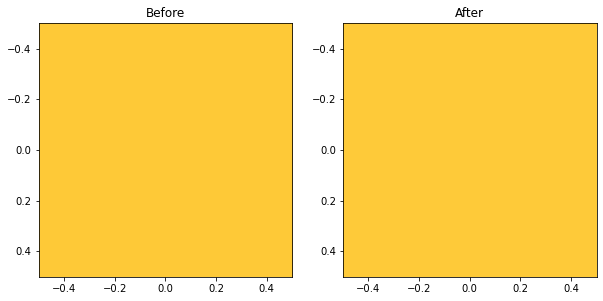

In [230]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))


ax1.imshow([[(BeforeRed / 256, BeforeGreen / 256, BeforeBlue / 256)]])
ax1.set_title('Before')

ax2.imshow([[(AfterRed / 256, AfterGreen / 256, AfterBlue / 256)]])
ax2.set_title('After')  